### Análise Exploratória dos Dados
 
##### Disponibilizados pelo AirBnb: http://insideairbnb.com/get-the-data.html

Em um primeiro momento, irei realizar uma análise destes dados, para depois avançar na criação de um Modelo de previsão de preços de imóveis do AirBnb no Rio, de maneira semelhante como ja é feito na sugestão dos preços no próprio aplicativo, tentarei replicar esse algoritmo de uma forma diferente.

##### Overview do notebook:

Este dataset possui em torno de 33.715 observações com 16 colunas, as categorias estão misturadas em textos e valores numéricos.

### Adquirindo os dados:
##### Importando as bibliotecas necessárias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
airbnb=pd.read_csv("../input/airbnb-rio/Rio_listings.csv")
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,332,4,243,2019-11-11,2.13,1,303
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,235,2019-10-08,2.04,3,119
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,273,2,271,2019-11-21,2.38,1,88
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,378,2,169,2019-11-13,2.28,1,85
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,130,3,316,2019-11-16,2.84,1,128
5,35893,Copa Tabajaras,154043,Seba,NaN,Copacabana,-22.96681,-43.18657,Private room,151,2,1,2012-06-25,0.01,1,89
6,48305,"Beach Block 6bed Penthouse, Ipanema Best Locat...",70933,Alex,NaN,Ipanema,-22.98633,-43.20256,Entire home/apt,3581,2,64,2019-11-17,0.60,5,311
7,48726,Rio de Janeiro Copacabana Ipanema,221941,Vana,NaN,Copacabana,-22.98359,-43.19382,Private room,80,3,42,2019-08-08,1.68,1,2
8,48901,Confortable 4BD 3.5BT Atlantic avenue,222884,Marcio,NaN,Copacabana,-22.96467,-43.17442,Entire home/apt,848,2,3,2018-10-04,0.06,1,194
9,49179,Djalma Ocean View - #100A,224192,David,NaN,Copacabana,-22.97934,-43.19113,Entire home/apt,189,3,78,2019-11-03,0.92,46,296


In [3]:
#Quantas linhas?
len(airbnb)

33715

In [4]:
#Quais os tipos de cada coluna?
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##### Neste momento, é necessário limpar estes dados.

In [5]:
#Verificar se há dados que precisam ser removidos do dataset
airbnb.isnull().sum()

id                                    0
name                                 61
host_id                               0
host_name                            20
neighbourhood_group               33715
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       14566
reviews_per_month                 14566
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Neste momento, é necessário tomar a decisão se é necessário ou não manter algumas categorias.
Tiramos estas variáveis:
'id','host_name','last_review','neighbourhood_group','reviews_per_month'

ID e Host_name - Por questões de ética, não são necessárias nesse modelo, mesmo que poderíamos traçar um perfil e desenvolver um algoritmo para prever a chance da pessoa utilizar o aplicativo. Não é o nosso intuito.

Last_review, neighbourhood_group e reviews_per_month - Irrelevância no modelo.
 
Embora informações sobre qual categoria da vizinhança poderiam ser relevantes no modelo, em nosso dataset estes dados estão vazios.

In [6]:
# Excluindo as colunas:
airbnb.drop(['id','host_name','last_review','neighbourhood_group','reviews_per_month'], axis=1, inplace=True)
# Verificando como ficou:
airbnb.head(5)

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Very Nice 2Br - Copacabana - WiFi,68997,Copacabana,-22.96592,-43.17896,Entire home/apt,332,4,243,1,303
1,Beautiful Modern Decorated Studio in Copa,102840,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,235,3,119
2,NICE & COZY 1BDR - IPANEMA BEACH,135635,Ipanema,-22.98302,-43.21427,Entire home/apt,273,2,271,1,88
3,Cosy flat close to Ipanema beach,153232,Ipanema,-22.98816,-43.19359,Entire home/apt,378,2,169,1,85
4,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Copacabana,-22.98127,-43.19046,Entire home/apt,130,3,316,1,128


In [7]:
#examinando os valores únicos da vizinhança:
airbnb.neighbourhood.unique()

array(['Copacabana', 'Ipanema', 'Barra da Tijuca', 'Flamengo', 'Leblon',
       'Itanhangá', 'Santa Teresa', 'Centro', 'Gávea', 'Campo Grande',
       'Laranjeiras', 'Humaitá', 'Botafogo', 'Santo Cristo', 'Glória',
       'São Conrado', 'São Cristóvão', 'Lagoa', 'Praça Seca', 'Maracanã',
       'Tijuca', 'São Francisco Xavier', 'Catete', 'Praia da Bandeira',
       'Cacuia', 'Recreio dos Bandeirantes', 'Jacarepaguá', 'Vidigal',
       'Marechal Hermes', 'Jardim Botânico', 'Rio Comprido',
       'Senador Camará', 'Irajá', 'Vargem Grande', 'Leme',
       'Vila da Penha', 'Anil', 'Estácio', 'Grajaú', 'Cosme Velho',
       'Gardênia Azul', 'Taquara', 'Bangu', 'Alto da Boa Vista', 'Urca',
       'Joá', 'Penha Circular', 'Jardim Sulacap', 'Praça da Bandeira',
       'Encantado', 'Vila Isabel', 'Lins de Vasconcelos', 'Cosmos',
       'Santíssimo', 'Gamboa', 'Bonsucesso', 'Camorim', 'Piedade',
       'Olaria', 'Vila Valqueire', 'Vargem Pequena', 'Cidade de Deus',
       'Guaratiba', 'Riachuelo

In [8]:
#Quais são os tipos de Acomodação?
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### Explorando de fato os dados
Vamos entender qual é o High User, e demonstrar seu local na distribuição, além de entender cada uma das colunas e como elas podem nos ajudar na construção do modelo de previsão.

In [9]:
#Começaremos com host_id, descobrindo quantos hosts únicos temos, depois mostrar qual os maiores hosts.
top_host=airbnb.host_id.value_counts().head(10)
top_host

91654021    205
81876389    130
31275569    100
1982737      74
70159544     64
13580277     62
22805631     59
3413189      58
4307081      57
66039372     50
Name: host_id, dtype: int64

In [10]:
#Só para confirmar nosso Top Host:
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

205

In [11]:
#Tamanho da imagem
sns.set(rc={'figure.figsize':(10,8)})

[Text(0, 0, '91654021'),
 Text(0, 0, '81876389'),
 Text(0, 0, '31275569'),
 Text(0, 0, '1982737'),
 Text(0, 0, '70159544'),
 Text(0, 0, '13580277'),
 Text(0, 0, '22805631'),
 Text(0, 0, '3413189'),
 Text(0, 0, '4307081'),
 Text(0, 0, '66039372')]

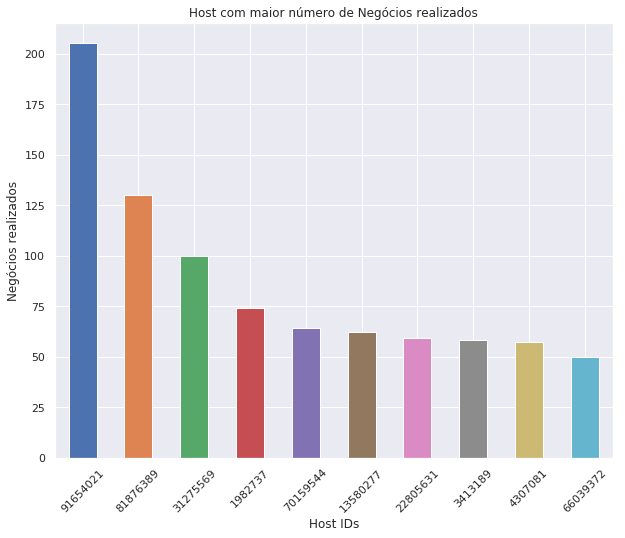

In [12]:
viz_1=top_host.plot(kind='bar')
viz_1.set_title('Host com maior número de Negócios realizados')
viz_1.set_ylabel('Negócios realizados')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Boa distribuição, o maior Host possui mais de 200 acomodações.

In [13]:
#Vamos descobrir mais sobre as regiões: 'Copacabana', 'Ipanema', 'Barra da Tijuca', 'Flamengo', 'Leblon'

#Copacabana
sub_1=airbnb.loc[airbnb['neighbourhood'] == 'Copacabana']
price_sub1=sub_1[['price']]
#Ipanema
sub_2=airbnb.loc[airbnb['neighbourhood'] == 'Ipanema']
price_sub2=sub_2[['price']]
#Barra da Tijuca
sub_3=airbnb.loc[airbnb['neighbourhood'] == 'Barra da Tijuca']
price_sub3=sub_3[['price']]
#Flamengo
sub_4=airbnb.loc[airbnb['neighbourhood'] == 'Flamengo']
price_sub4=sub_4[['price']]
#Leblon
sub_5=airbnb.loc[airbnb['neighbourhood'] == 'Leblon']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [14]:
#Criando uma lista vazia para ser preenchida:
p_l_b_n_2=[]
#Criando uma lista para nosso objeto de estudo
nei_list=['Copacabana', 'Ipanema', 'Barra da Tijuca', 'Flamengo', 'Leblon']
#Colocando o range de preços na nossa lista
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#Trocando o nome da coluna de preço para o nome da área, para ficar mais fácil de ler:
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#Finalizando o dataframe:   
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Copacabana,Ipanema,Barra da Tijuca,Flamengo,Leblon
Stats,,,,,
min,0.0,34.0,42.0,38.0,46.0
25%,151.0,218.0,239.0,122.0,273.0
50%,248.0,374.0,449.0,218.0,449.0
75%,449.0,714.0,1020.0,399.0,802.0
max,41982.0,25000.0,41982.0,35001.0,25000.0


In [15]:
sub_6=airbnb.loc[airbnb['neighbourhood'].isin(['Copacabana','Barra da Tijuca','Ipanema','Leblon','Flamengo'])]

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood')

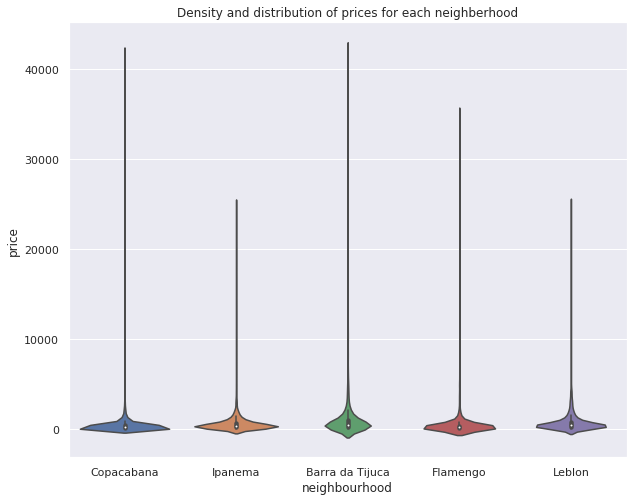

In [16]:
#Criando um dataframe com os 5 bairros estudados:
top_5= sub_6
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=top_5, x='neighbourhood', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood')

##### Tentar entender isso:

O gráfico está muito distorcido devido a presença de outliers, vamos identificar uma forma de limpar para facilitar a visualização.

In [17]:
#Descobrindo os top 10:
airbnb.neighbourhood.value_counts().head(10)

Copacabana                  8443
Barra da Tijuca             3837
Ipanema                     2885
Jacarepaguá                 1987
Botafogo                    1660
Recreio dos Bandeirantes    1649
Leblon                      1555
Santa Teresa                1060
Centro                       900
Flamengo                     867
Name: neighbourhood, dtype: int64

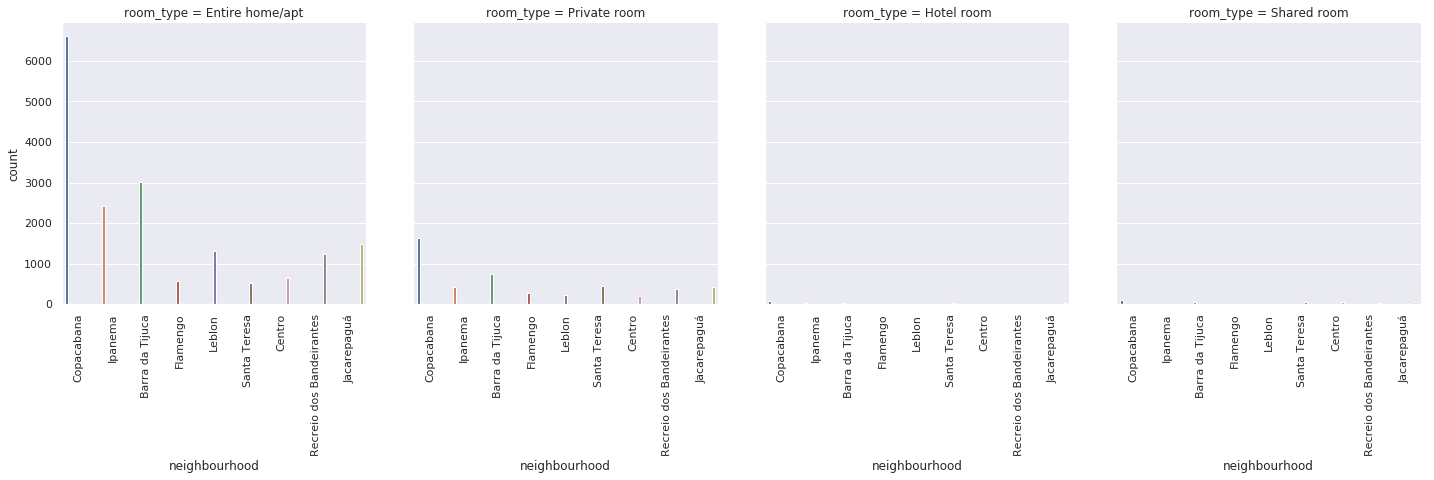

In [18]:
#Fazendo um data frame para os 10 maiores bairros:
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Copacabana','Barra da Tijuca','Ipanema','Jacarepaguá',
                 'Botafogo ','Recreio dos Bandeirantes','Leblon','Santa Teresa','Centro','Flamengo'])]
#Mostrando os diferentes tipos de acomodação nos top 10:
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

##### Aqui conseguimos observar que os maiores valores estão na categoria de "Entire home/apt" e "Private room", quase sem espaço para Shared room e Hotel room.

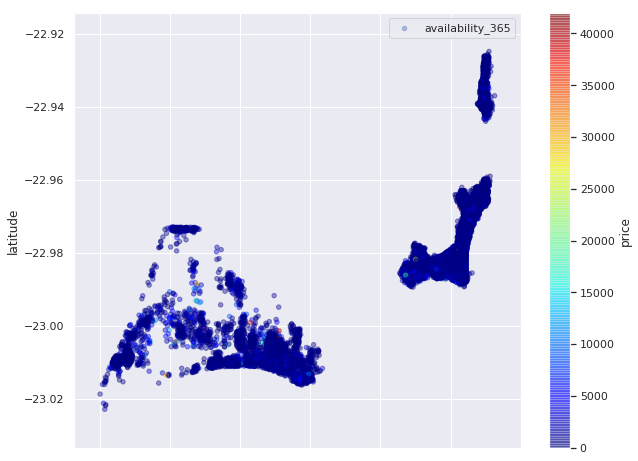

In [19]:
#Realizando um Scatterplot utilizando os dados de latitude e longitude. Estamos utilizando os 5 bairros estudados.
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

##### Vamos tentar utilizar o pacote Folium para representação no mapa, para isso, utilizamos as informações de longitude e latitute disponibilizado nos dados,

In [20]:
#print(airbnb['latitude'].min)
#print(airbnb['longitude'].min)
#print(airbnb['latitude'].max)
#print(airbnb['longitude'].max)

In [21]:
import folium
from folium.plugins import HeatMap
m=folium.Map([-22.96592,-43.17896],zoom_start=11)
HeatMap(airbnb[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

#### Com o mapa devidamente plotado, podemos verificar a alta densidade no Leste do rio de janeiro, até antes de niterói.

In [22]:
#Vamos analisar a coluna Names:
#Onde vamos colocar nossas strings:
_names_=[]
#Pegando a Name e colocando ela na lista:
for name in airbnb.name:
    _names_.append(name)
#Splitando a String 
def split_name(name):
    spl=str(name).split()
    return spl
#Criando a coluna em que vamos contar quanto a string aparece:
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
#Pegando a _name_ da nossa lista nova e usando a função de split para contar as palavras.
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [23]:
#Usando a função Counter:
from collections import Counter
#Identificando as 25 palavras mais usadas:
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [24]:
#Criando um dataframe para plotar nossas novas informações:
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'copacabana'),
 Text(0, 0, '-'),
 Text(0, 0, 'in'),
 Text(0, 0, 'apartamento'),
 Text(0, 0, 'da'),
 Text(0, 0, 'de'),
 Text(0, 0, 'quarto'),
 Text(0, 0, 'em'),
 Text(0, 0, 'rio'),
 Text(0, 0, 'e'),
 Text(0, 0, 'praia'),
 Text(0, 0, 'barra'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'ipanema'),
 Text(0, 0, 'no'),
 Text(0, 0, '2'),
 Text(0, 0, 'para'),
 Text(0, 0, 'the'),
 Text(0, 0, 'do'),
 Text(0, 0, 'beach'),
 Text(0, 0, 'na'),
 Text(0, 0, 'a'),
 Text(0, 0, 'com'),
 Text(0, 0, 'tijuca'),
 Text(0, 0, 'room')]

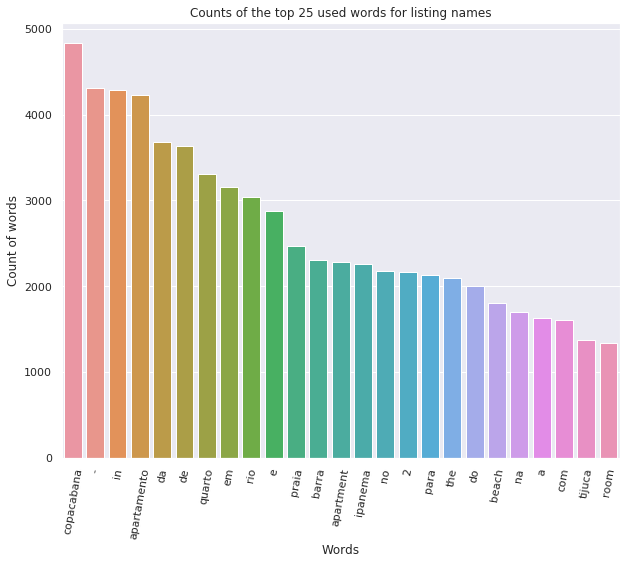

In [25]:
#Plotando, usando Barplot:
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

Palavras-chave em inglês podem significar a procura por turismo internacional, principalmente nas praias.

In [26]:
#Vamos ver os top10 Reviews:
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
176,2 bedroom apart with view to the lagoon and ga...,319672,Lagoa,-22.97635,-43.19809,Entire home/apt,315,2,372,5,281
9056,"COPACABANA,PRAIA/METRO,MELHOR CUSTO BENEFÍCIO",24875639,Copacabana,-22.96612,-43.18018,Private room,71,1,372,5,148
898,Praia de Copacabana,5475732,Copacabana,-22.97078,-43.18992,Entire home/apt,202,3,366,1,277
138,❤️ MODERN LOFT IN BEST SPOT OF IPANEMA 1 ❤️,503995,Ipanema,-22.98397,-43.20353,Entire home/apt,101,1,361,7,334
480,Apart hotel - COPACABANA beach,3413077,Copacabana,-22.97484,-43.18711,Entire home/apt,332,1,347,1,326
19,Apart-hotel in Ipanema with service and garage,319672,Ipanema,-22.98630,-43.19708,Entire home/apt,378,2,338,5,227
372,CASABLANCA 1 STUNNING BEACHFRONT,2444956,Vidigal,-22.99187,-43.23301,Entire home/apt,202,2,336,3,133
4,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Copacabana,-22.98127,-43.19046,Entire home/apt,130,3,316,1,128
1642,Copacabana Beach - Av Atlântica (Sea View - 11th),10675906,Copacabana,-22.97667,-43.18913,Entire home/apt,256,1,305,2,198
133,Varandão Atelier Lounge Sta. Teresa,1134264,Santa Teresa,-22.91647,-43.17874,Entire home/apt,160,2,301,2,311


In [27]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 214.7


Top reviews possui **372** reviews.

Preço médio das acomodações por noite: **214,7**

**9/10** São casas inteiras,** 1/10** são "Private Room"

### Conclusão da Análise Exploratória dos Dados:

Em andamento

### Parte 2 - Criando os modelos de previsão

Vamos testar os seguintes modelos:

Regressão Linear e Random Forest:

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.family'] = "Arial"
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import collections
import itertools
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample
from xgboost import XGBRegressor
#Model interpretation modules
import eli5
import lime
import lime.lime_tabular
import shap
shap.initjs()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.



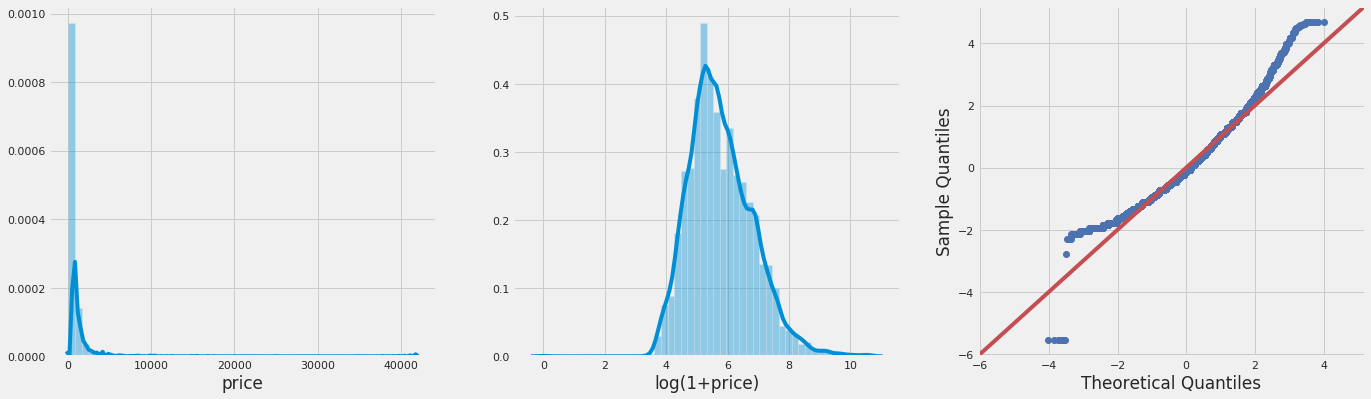

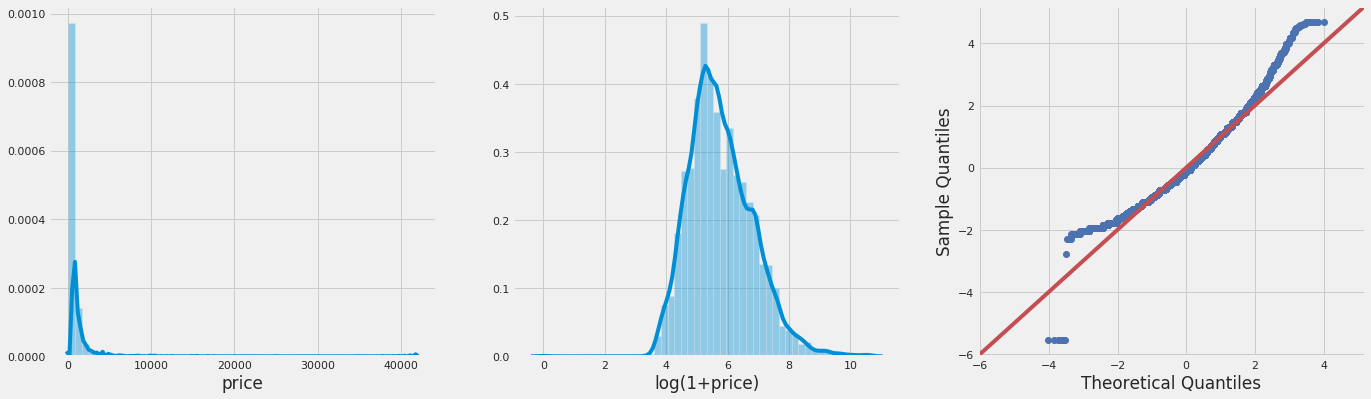

In [29]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(airbnb['price'], ax=axes[0])
sns.distplot(np.log1p(airbnb['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(airbnb['price']), stats.norm, fit=True, line='45', ax=axes[2])

Valores impac